# Template

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.optimize import curve_fit

plt.style.use('science')
plt.rcParams.update({'font.size': 12})

In [2]:
deg_to_rad = lambda deg: 2*np.pi*deg / 360

# Gitterkonstante bestimmen

In [ ]:
angle_left = np.array([42.8, 42.9, 42.8, 42.9, 42.9])
angle_right = 360 - np.array([318.1, 318.2, 318.3, 318.2, 318.2])
delta_angle = 0.1

angle_left = deg_to_rad(angle_left)
angle_right = deg_to_rad(angle_right)
angels = np.concatenate([angle_left, angle_right])
delta_angle = deg_to_rad(delta_angle)

n = 2 # 2. Beugungsmaximum
lambda_Na1 = 588.995 #nm
lambda_Na2 = 589.592 #nm 
lam_av = (lambda_Na1 + lambda_Na2)/2

g = n*lam_av / np.sin(angels)
dg = g / np.tan(angels)* delta_angle
student_t = 0.34

print(1/570 * 10**6)
print(np.mean(g))
print(np.std(g)/np.sqrt(len(g)))
print(np.sqrt(np.std(g)**2/len(g) + np.mean(dg)**2))

1754.3859649122808
1750.4626011635107
9.00951864165477
6.5748179778575135


# Wellenlänge bestimmen Gitter

In [5]:
g = 1750.4626011635107 #nm
dg = 6.5748179778575135
delta_angle = 0.1

def lambda_color(color_angle, d_angle):
    ang = deg_to_rad(color_angle)
    l = g * np.sin(ang)   
    dl = np.sin(ang)*dg + g*np.cos(ang)*deg_to_rad(d_angle)
    return l, dl

lila_l  = np.array([13.2, 13.2, 13.3])
blau_l  = np.array([14.3, 14.2, 14.3])
dgrün_l = np.array([16.1, 16.0, 16.2])
hgrün_l = np.array([18.0, 18.1, 17.9])
gelb_l  = np.array([19.2, 19.1, 19.1])

colors_l = [lila_l, blau_l, dgrün_l, hgrün_l, gelb_l]

lila_r = np.array([346.5, 346.6, 346.6])
blau_r = np.array([345.5, 345.5, 345.4])
dgrün_r = np.array([343.6, 343.5, 343.6])
hgrün_r = np.array([341.8, 341.7, 341.7])
gelb_r = np.array([340.6, 340.6, 340.7])

colors_r = [lila_r, blau_r, dgrün_r, hgrün_r, gelb_r]
c_names = ['lila', 'blau', 'dunkelgrün', 'hellgrün', 'gelb']

lambda_colors = []
dlambda_colors = []

for i in range(len(colors_l)):
    ll, dll = lambda_color(colors_l[i], delta_angle)
    print(ll, dll)
    lr, dlr = lambda_color(360 - colors_r[i], delta_angle)
    print(lr, dlr)
    l = np.concatenate([ll, lr])
    dl = np.concatenate([dll, dlr])
    lambda_colors.append(l)
    dlambda_colors.append(dl)

for i in range(len(lambda_colors)):
    lbar = np.mean(lambda_colors[i])
    stdl = np.std(lambda_colors[i])
    lbari = np.mean(dlambda_colors[i])
    lenl = len(lambda_colors[i])
    uncert = np.sqrt(stdl**2/lenl + lbari**2)
    print(f'({lbar}, {uncert}),')

[399.71965807 399.71965807 402.69346136] [4.47577901 4.47577901 4.4857266 ]
[408.63737884 405.66603796 405.66603796] [4.50558077 4.49566054 4.49566054]
[432.3625343  429.40140477 432.3625343 ] [4.58444605 4.57463646 4.58444605]
[438.28083318 438.28083318 441.2379845 ] [4.60402332 4.60402332 4.61379093]
[485.42892936 482.49288284 488.36349718] [4.75860203 4.74904833 4.76814123]
[494.22816096 497.15823906 494.22816096] [4.78717603 4.79667157 4.78717603]
[540.92269178 543.82747113 538.01626468] [4.93733519 4.94659351 4.92806184]
[546.73059389 549.63205122 549.63205122] [4.95583675 4.96506491 4.96506491]
[575.66876589 572.78269459 572.78269459] [5.0474343  5.03834328 5.03834328]
[581.43563892 581.43563892 578.55308359] [5.0655702  5.0655702  5.05650995]
(403.6837053788142, 4.685250175753012),
(435.3210207029611, 4.901609675890528),
(490.31664506072326, 5.235994943477147),
(544.7935206529223, 5.2556621083376776),
(577.1097527517126, 5.264758536886285),


# Prisma Winkelmessung

In [4]:
angle_left = np.array([64.8, 64.8, 64.7, 64.7, 64.9])
angle_right = 360 - np.array([305.3, 305.2, 305.3, 305.3, 305.4])
delta_angle = 0.1

gamma = (angle_left + angle_right)/2
d_gamma = 2*delta_angle
print(gamma, d_gamma)
print(f"({np.mean(gamma)}, {np.sqrt(np.std(gamma)**2/len(gamma) + d_gamma**2)})")

[59.75 59.8  59.7  59.7  59.75] 0.2
(59.739999999999995, 0.20069877926883375)


# Prisma Wellenlänge

In [3]:
# Ergebnisse aus den vorigen versuch Prisma 
gamma = 59.739999999999995
dgamma = 0.20069877926883375
delta_angle = 0.1 
phi_0 = 15.1

# Ergebnisse des vorigen Versuchs mit Gitter
lambda_colors = [
    (403.6837053788142, 4.685250175753012),
    (435.3210207029611, 4.901609675890528),
    (490.31664506072326, 5.235994943477147),
    (544.7935206529223, 5.2556621083376776),
    (577.1097527517126, 5.264758536886285)
]

# MEssergebnisse von diesem Versuch
lila_full = np.array([285.9, 286.0, 286.0, 285.9, 284.1])
blue_angle = np.array([288.0, 283.3, 288.5, 288.1])
dgruen_angle = np.array([290.5, 290.8, 291.1])
hgruen_angle = np.array([291.9, 292.3, 292.8])
yellow_full = np.array([292.6, 292.9, 293.5, 292.8, 293.5])

colors_list = [lila_full, blue_angle, dgruen_angle, hgruen_angle, yellow_full]

def compute_n(color_angle):
    delta = 360.0 - color_angle - phi_0
    delta_bar = np.mean(delta)
    delta_stat = np.std(delta) / np.sqrt(len(delta))
    ddelta = np.sqrt(delta_stat**2 + delta_angle**2)

    A = 0.5 * deg_to_rad(gamma + delta_bar)  
    B = 0.5 * deg_to_rad(gamma)

    n = np.sin(A) / np.sin(B)

    ddelta_rad = deg_to_rad(ddelta)
    dgamma_rad = deg_to_rad(dgamma)

    err_delta = abs(0.5*np.cos(A)/np.sin(B))
    err_gamma = abs(np.sin(0.5*deg_to_rad(delta_bar))/(np.cos(deg_to_rad(gamma))-1))

    dn = np.sqrt((err_delta*ddelta_rad)**2 + (err_gamma*dgamma_rad)**2)
    # dn = err_delta*ddelta_rad + err_gamma*dgamma_rad

    return n, dn, delta_bar, ddelta

n_vals = []
n_errs = []
delta = []
ddelta = []
wavelengths = []
d_wavelengths = []

for i, angle_arr in enumerate(colors_list):
    n_i, dn_i, delta_mean_i, ddelta_i = compute_n(angle_arr)
    delta.append(delta_mean_i)
    ddelta.append(ddelta_i)
    n_vals.append(n_i)
    n_errs.append(dn_i)
    wavelengths.append(lambda_colors[i][0])
    d_wavelengths.append(lambda_colors[i][1])

n_vals = np.array(n_vals)
n_errs = np.array(n_errs)
delta = np.array(delta)
ddelta = np.array(ddelta)
wavelengths = np.array(wavelengths)
d_wavelengths = np.array(d_wavelengths)

print(delta, ddelta)
print(n_vals, n_errs)

[59.32       57.925      54.1        52.56666667 51.84      ] [0.34629467 1.06968161 0.17320508 0.23491527 0.19411337]
[1.73059509 1.71807219 1.68243471 1.66762006 1.66049476] [0.00465586 0.01028536 0.00361326 0.0038772  0.00363092]


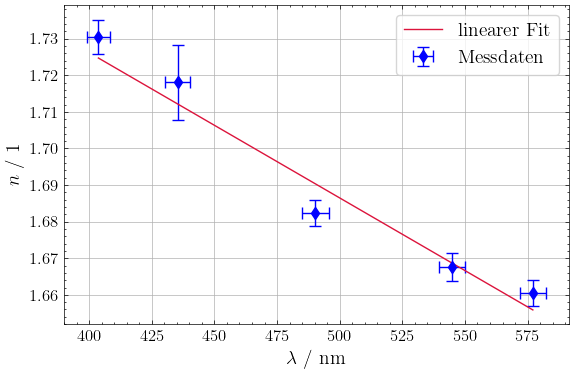

k: -0.00039704578036784874 pm 3.122447341698499e-05
d: 1.8850110434393772 pm 0.016070819341288775


In [4]:
# -------------------- Linear Fit --------------------
def ffit(x, k, d):
    return k*x + d

lambda_fit = np.linspace(min(wavelengths), max(wavelengths), 1000)
popt, pcov = curve_fit(ffit, wavelengths, n_vals, sigma=n_errs, absolute_sigma=True)
k, d = popt
dk, dd = np.sqrt(np.diag(pcov))
n_fit = ffit(lambda_fit, k, d)

colors = ['lila', 'blau', 'blaugrün', 'hellgrün', 'gelb']
# -------------------- Plot --------------------
plt.figure(figsize=(6,4))

plt.errorbar(wavelengths, n_vals, yerr=n_errs, xerr=d_wavelengths, fmt='d', color='blue', label='Messdaten', capsize=4)
plt.plot(lambda_fit, n_fit, linestyle='-', color='crimson', label='linearer Fit')

plt.xlabel(r'$\lambda$ / nm', fontsize=14)
plt.ylabel(r'$n$ / 1', fontsize=14)
plt.legend(loc='best', fontsize=14, frameon=True)
plt.grid(True)

plt.tight_layout()
plt.show()
print(f'k: {k} pm {dk}')
print(f'd: {d} pm {dd}')

In [19]:
R = abs(k)*35*10**6
dR = R*np.sqrt((1/35)**2 + (dk/k)**2)
print(R, dR)

13896.602312874706 1162.7471063880214
